### SQLite

In [2]:
import sqlite3

In [2]:
# SQLite DB에 연결 (파일이 없다면 새로 생성)
conn = sqlite3.connect('first.db')
print('데이터베이스 연결 성공!')
conn.close()

데이터베이스 연결 성공!


In [6]:
# 테이블 생성
# 1. DB 연결
conn = sqlite3.connect('first.db')
# 2. 데이터 컨트롤
cursor = conn.cursor()
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS users (
 id INTEGER PRIMARY KEY AUTOINCREMENT,
 name TEXT NOT NULL,
 age INTEGER,
 city TEXT
 )
""")
print('테이블 생성 완료')
# 3. 연결 종료
conn.close()

테이블 생성 완료


In [3]:
# 데이터 삽입 : 행단위 입력 => (이름, 나이, 도시)
# insert into users (name, age, city) values ('son', 30, 'london')
# 1. DB 연결
conn = sqlite3.connect('first.db')
# 2. 데이터 컨트롤
cursor = conn.cursor()

sql = "INSERT INTO users (name, age, city) VALUES (?, ?, ?)"

cursor.execute(sql, ("Alice", 30, "New York"))

# 여러행의 데이터 정의의
data = [
 ("Bob", 25, "Los Angeles"),
 ("Charlie", 35, "Chicago"),
 ("Diana", 28, "Houston")
 ]

cursor.executemany(sql, data)

# 변경사항의 물리적 저장
conn.commit() # 작업이 끝났으니 파일에 저장해!
print('insert ok!')

# 3. close
conn.close()

insert ok!


In [10]:
# 질의 (검색) : 데이터 검색 => 행단위 검색색
# 1. DB 연결
conn = sqlite3.connect('first.db')
# 2. 데이터 컨트롤
cursor = conn.cursor()

# 질의 : select 컬럼, 컬럼, ... from 테이블 이름
sql = 'select * from users'

cursor.execute(sql)

#데이터 조회 : fetchall, fetchone
rows = cursor.fetchall()
for row in rows :
    print(row, type(row))

#3. 연결 종료
conn.close()

(1, 'Alice', 20, 'New York') <class 'tuple'>
(2, 'Bob', 25, 'Los Angeles') <class 'tuple'>
(4, 'Diana', 28, 'Houston') <class 'tuple'>


In [6]:
# 데이터의 수정 => 행단위 행 안에 컬럼 값을 수정
# 행을 찾고 -> 해당 행의 컬럼의 값을 지정해서 변경
# update 테이블 이름 set col_name=value, col_name=value, ..... where 
# 1. DB 연결
conn = sqlite3.connect('first.db')
# 2. 데이터 컨트롤
cursor = conn.cursor()
# sql : 1번 회원읜 나이를 20으로 변경
sql = 'update users set age=? where id=?'

cursor.execute(sql, (20, 1))

# 작업 완료
conn.commit()
print('update ok!')

# 연결 종료
conn.close()

update ok!


In [9]:
# 데이터 삭제 => 행단위 삭제
# delete from 테이블이름 where col_name=value
# 1. DB 연결
conn = sqlite3.connect('first.db')
# 2. 데이터 컨트롤
cursor = conn.cursor()

sql = 'delete from users where id=?'

cursor.execute(sql, (3,))

# 작업완료
conn.commit()
print('delete ok!')

#3. 연결 종료
conn.close()

delete ok!


### Matplotlib

In [14]:
"""
평균 : 전체 데이터를 대표
중앙값 : 극단값들이 평균에 영향을 끼칠 때는 물리적으로 중앙에 있는 값을 선택
최빈값 : 얼마난 빈도수가 큰지

분산 : 데이터가 얼마나 퍼져있는지를 나타냄
표준편차 : 한 데이터에서 다음 데이터가 어느 정도인지 예측함. 분산의 루트
사분위수 : 데이터를 4개의 그룹으로 나눠 q1, q2, q3 으로 나눠 계산 이상치 파악

정규분포 : 평균을 중심으로 대칭적인 상태를 말함
왜도 : 그래프 기준 양, 음 으로 치우쳐져 있는 상태를 말함
첨도 : 전체적인 모양이 완만한지, 뾰족한지에 대한 상태를 말함
"""
import matplotlib.pyplot as plt

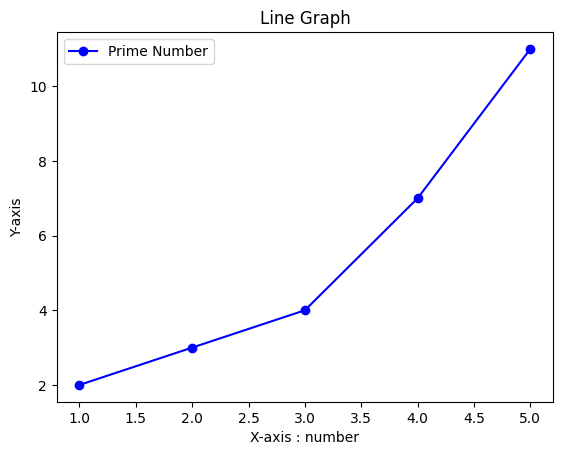

In [15]:
# 데이터 준비
x = [1, 2, 3, 4, 5]  # x축 데이터
y = [2, 3, 4, 7, 11]  # y축 데이터

# 그래프 생성
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Prime Number')

# 그래프 설정
plt.title('Line Graph')
plt.xlabel('X-axis : number')
plt.ylabel('Y-axis')
plt.legend()

# 그래프 출력
plt.show()

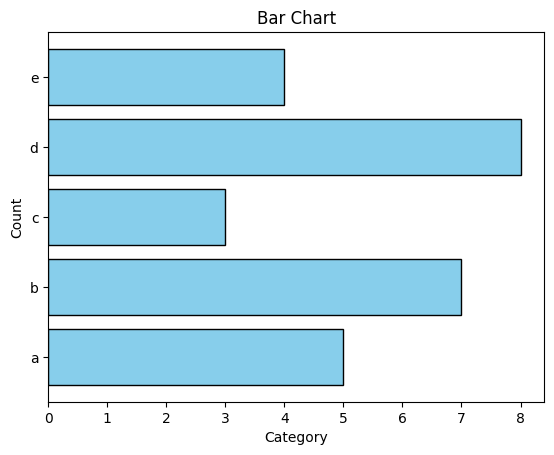

In [18]:
# 데이터 준비
ctgy = ['a', 'b', 'c', 'd', 'e']
val = [5, 7, 3, 8, 4]

# 그래프 생성
#plt.bar(ctgy, val, color='skyblue', edgecolor='black')
plt.barh(ctgy, val, color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')

#그래프 출력
plt.show()

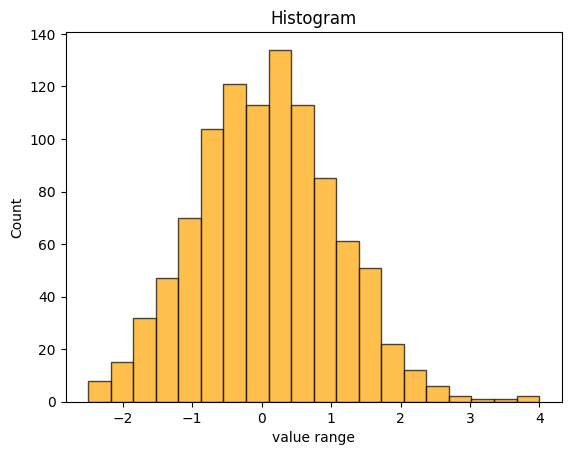

In [22]:
import numpy as np

# 데이터 준비
data = np.random.randn(1000)
#print(data)

# 그래프 생성
plt.hist(data, bins=20, color='orange', edgecolor='black', alpha=0.7)

# 설정
plt.title('Histogram')
plt.xlabel('value range')
plt.ylabel('Count')

# 그래프 출력
plt.show()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

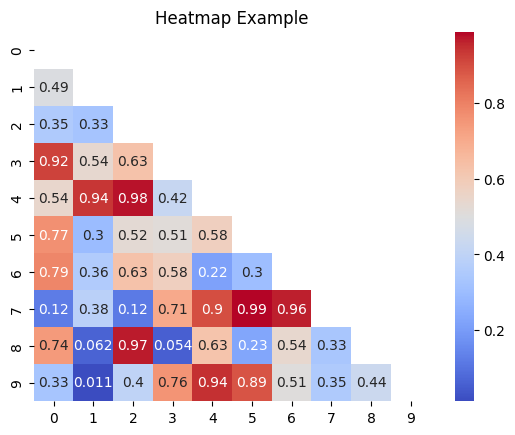

In [4]:
# 예제 데이터 생성: 상관관계 행렬
data=np.random.rand(10, 10)
mask=np.triu(np.ones_like(data, dtype=bool)) # 상단 삼각형을 마스킹

sns.heatmap(data, annot=True, mask=mask, cmap='coolwarm')
plt.title("Heatmap Example")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19484\2726752209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')


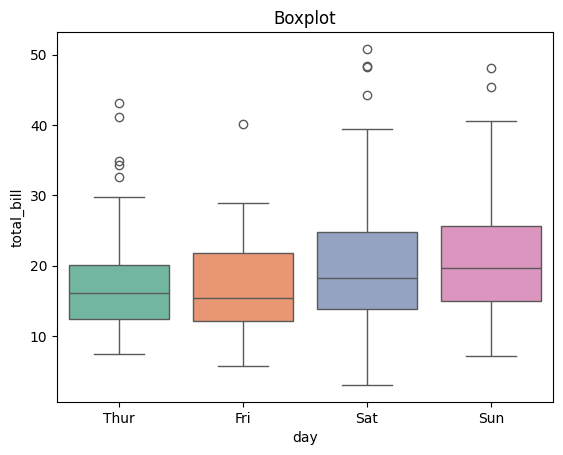

In [6]:
# 박스플롯 : 데이터의 분포와 이상치 탐지

# 데이터 준비
tips = sns.load_dataset('tips')

# 그래프 생성
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')
plt.title('Boxplot')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19484\2643040027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day', y='total_bill', data=tips, palette='muted')


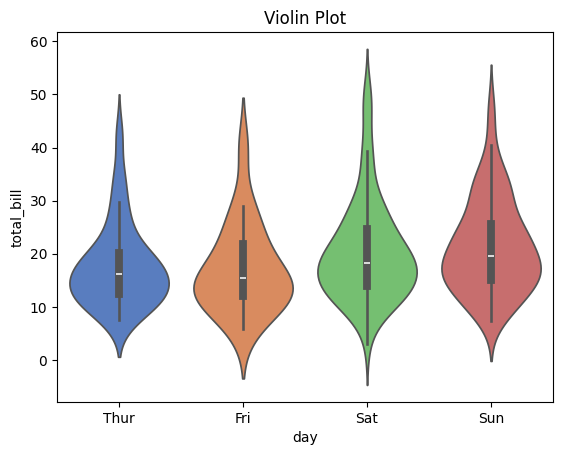

In [9]:
sns.violinplot(x='day', y='total_bill', data=tips, palette='muted')
plt.title('Violin Plot')

plt.show()

In [10]:
import pandas as pd

# 고객 정보 데이터프레임
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
 })

 # 주문 정보 데이터프레임
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [1, 2, 4],
    'product': ['Laptop', 'Tablet', 'Smartphone']
 })

In [12]:
# Inner Join (공통된 customer_id 값만 join)
result_inner = pd.merge(customers, orders, on='customer_id', how='inner')
print('inner join')
print(result_inner)

inner join
   customer_id   name  order_id product
0            1  Alice       101  Laptop
1            2    Bob       102  Tablet


In [ ]:
# left join (customer 데이터는 모두 유지)
result_left = pd.merge(customers, orders, on='customer_id', how='left')
#result_left = pd.merge(orders, customers, on='customer_id', how='left')
print('left join')
print(result_left)

left join
   customer_id     name  order_id product
0            1    Alice     101.0  Laptop
1            2      Bob     102.0  Tablet
2            3  Charlie       NaN     NaN


In [18]:
# 1월 매출 데이터
sales_jan = pd.DataFrame({
    'month': ['January', 'January', 'January'],
    'product': ['Laptop', 'Tablet', 'Smartphone'],
    'sales': [100, 150, 200]
 })
 # 2월 매출 데이터
sales_feb = pd.DataFrame({
    'month': ['February', 'February', 'February'],
    'product': ['Laptop', 'Tablet', 'Smartphone'],
    'sales': [120, 160, 220]
 })
 # Row-wise Concatenation (1월과 2월 데이터를 이어붙임)
sales_combined= pd.concat([sales_jan, sales_feb], axis=1)
 # 결과 출력
print(sales_combined)

     month     product  sales     month     product  sales
0  January      Laptop    100  February      Laptop    120
1  January      Tablet    150  February      Tablet    160
2  January  Smartphone    200  February  Smartphone    220


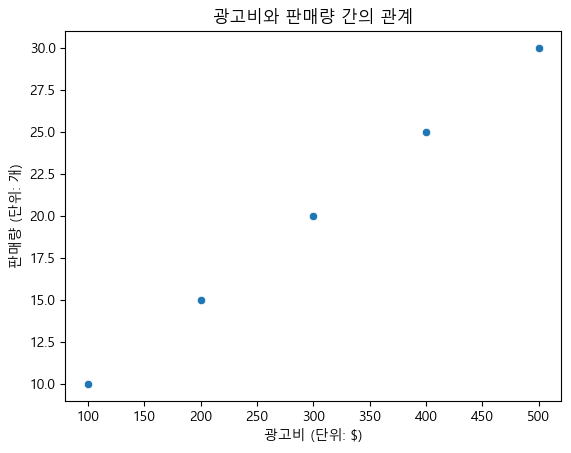

In [20]:
# 산점도 : 데이터 간의 관계 확인 목적적
import seaborn as sns
import matplotlib.pyplot as plt
 # 데이터
import pandas as pd
data = pd.DataFrame({
    'Ad_Spend': [100, 200, 300, 400, 500],
    'Sales': [10, 15, 20, 25, 30]
 })
plt.rc('font', family='Malgun Gothic') # For Windows
 # 산점도 생성
sns.scatterplot(x='Ad_Spend', y='Sales', data=data)
plt.title("광고비와 판매량 간의 관계")
plt.xlabel("광고비 (단위: $)")
plt.ylabel("판매량 (단위: 개)")
plt.show()


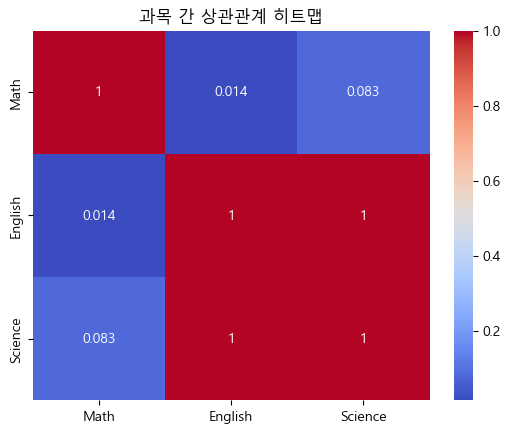

In [23]:
#히트맵 : 변수 간 상관관계 분석

# 데이터 생성
data = pd.DataFrame({
 'Math': [90, 80, 70, 60, 85],
 'English': [85, 75, 65, 55, 10],
 'Science': [88, 78, 68, 58, 23]
 })

# 상관계수 계산
correlation = data.corr()
plt.rc('font', family='Malgun Gothic') # For Windows
 # 히트맵 생성
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("과목 간 상관관계 히트맵")
plt.show()